In [39]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [40]:
DATASET_URL = "./housing.data"
FEATURES = [
	"crim",
	"zn",
	"indus",
	"chas",
	"nox",
	"rm",
	"age",
	"dis",
	"rad",
	"tax",
	"ptratio",
	"b",
	"lstat"
]
LABEL = "medv"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"crim": "float32",
	"zn": "float32",
	"indus": "float32",
	"chas": "float32",
	"nox": "float32",
	"rm": "float32",
	"age": "float32",
	"dis": "float32",
	"rad": "float32",
	"tax": "float32",
	"ptratio": "float32",
	"b": "float32",
	"lstat": "float32",
	"medv": "float32"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=512
BATCH_SIZE=50
SEED=1
COLUMNS

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [41]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [42]:
data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float32
 1   zn       506 non-null    float32
 2   indus    506 non-null    float32
 3   chas     506 non-null    float32
 4   nox      506 non-null    float32
 5   rm       506 non-null    float32
 6   age      506 non-null    float32
 7   dis      506 non-null    float32
 8   rad      506 non-null    float32
 9   tax      506 non-null    float32
 10  ptratio  506 non-null    float32
 11  b        506 non-null    float32
 12  lstat    506 non-null    float32
 13  medv     506 non-null    float32
dtypes: float32(14)
memory usage: 27.8 KB


In [44]:
# Missing values
data = data.dropna()
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [45]:
# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,506.000000,506.000000,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,506.000000
mean,0.000000,-2.874216e-08,-6.031142e-08,2.638625e-08,-1.507786e-08,7.538928e-09,0.000000,0.000000,0.000000,6.031142e-08,0.000000,2.261678e-08,1.507786e-08,22.532806
std,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990,1.000990,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,9.197104
min,-0.419782,-4.877223e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437,-1.267069,-0.982843,-1.313990e+00,-2.707379,-3.907193e+00,-1.531127e+00,5.000000
25%,-0.410970,-4.877223e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686300e-01,-0.837448,-0.805688,-0.637962,-7.675760e-01,-0.488039,2.050714e-01,-7.994200e-01,17.025000
50%,-0.390667,-4.877223e-01,-2.110986e-01,-2.725986e-01,-1.442176e-01,-1.084653e-01,0.317382,-0.279323,-0.523001,-4.646726e-01,0.274859,3.811866e-01,-1.812535e-01,21.200001
75%,0.007397,4.877223e-02,1.015999e+00,-2.725986e-01,5.986791e-01,4.827678e-01,0.906798,0.662371,1.661245,1.530926e+00,0.806576,4.336511e-01,6.030187e-01,25.000000
max,9.933930,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494,3.960518,1.661245,1.798194e+00,1.638828,4.410519e-01,3.548771e+00,50.000000


In [46]:
# Normalise Label
min_max_scaler = preprocessing.MinMaxScaler()
data[[LABEL]] = min_max_scaler.fit_transform(data[[LABEL]])
# standard_scaler = preprocessing.StandardScaler()
# data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,506.000000,506.000000,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,506.000000
mean,0.000000,-2.874216e-08,-6.031142e-08,2.638625e-08,-1.507786e-08,7.538928e-09,0.000000,0.000000,0.000000,6.031142e-08,0.000000,2.261678e-08,1.507786e-08,0.389618
std,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990,1.000990,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,0.204380
min,-0.419782,-4.877223e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437,-1.267069,-0.982843,-1.313990e+00,-2.707379,-3.907193e+00,-1.531127e+00,0.000000
25%,-0.410970,-4.877223e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686300e-01,-0.837448,-0.805688,-0.637962,-7.675760e-01,-0.488039,2.050714e-01,-7.994200e-01,0.267222
50%,-0.390667,-4.877223e-01,-2.110986e-01,-2.725986e-01,-1.442176e-01,-1.084653e-01,0.317382,-0.279323,-0.523001,-4.646726e-01,0.274859,3.811866e-01,-1.812535e-01,0.360000
75%,0.007397,4.877223e-02,1.015999e+00,-2.725986e-01,5.986791e-01,4.827678e-01,0.906798,0.662371,1.661245,1.530926e+00,0.806576,4.336511e-01,6.030187e-01,0.444444
max,9.933930,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494,3.960518,1.661245,1.798194e+00,1.638828,4.410519e-01,3.548771e+00,1.000000


In [47]:
# Set categories
for column in COLUMNS:
	if data[column].dtype.name == "category":
		labelencoder = preprocessing.LabelEncoder()
		data[column] = labelencoder.fit_transform(data[column])
		categories=data[column].unique()
		data[column] = data[column].astype(pd.CategoricalDtype(categories=categories))
		print(data[column].cat.categories.tolist())

In [48]:
data = data.astype(dtype=DTYPE)
data.dtypes

crim       float32
zn         float32
indus      float32
chas       float32
nox        float32
rm         float32
age        float32
dis        float32
rad        float32
tax        float32
ptratio    float32
b          float32
lstat      float32
medv       float32
dtype: object

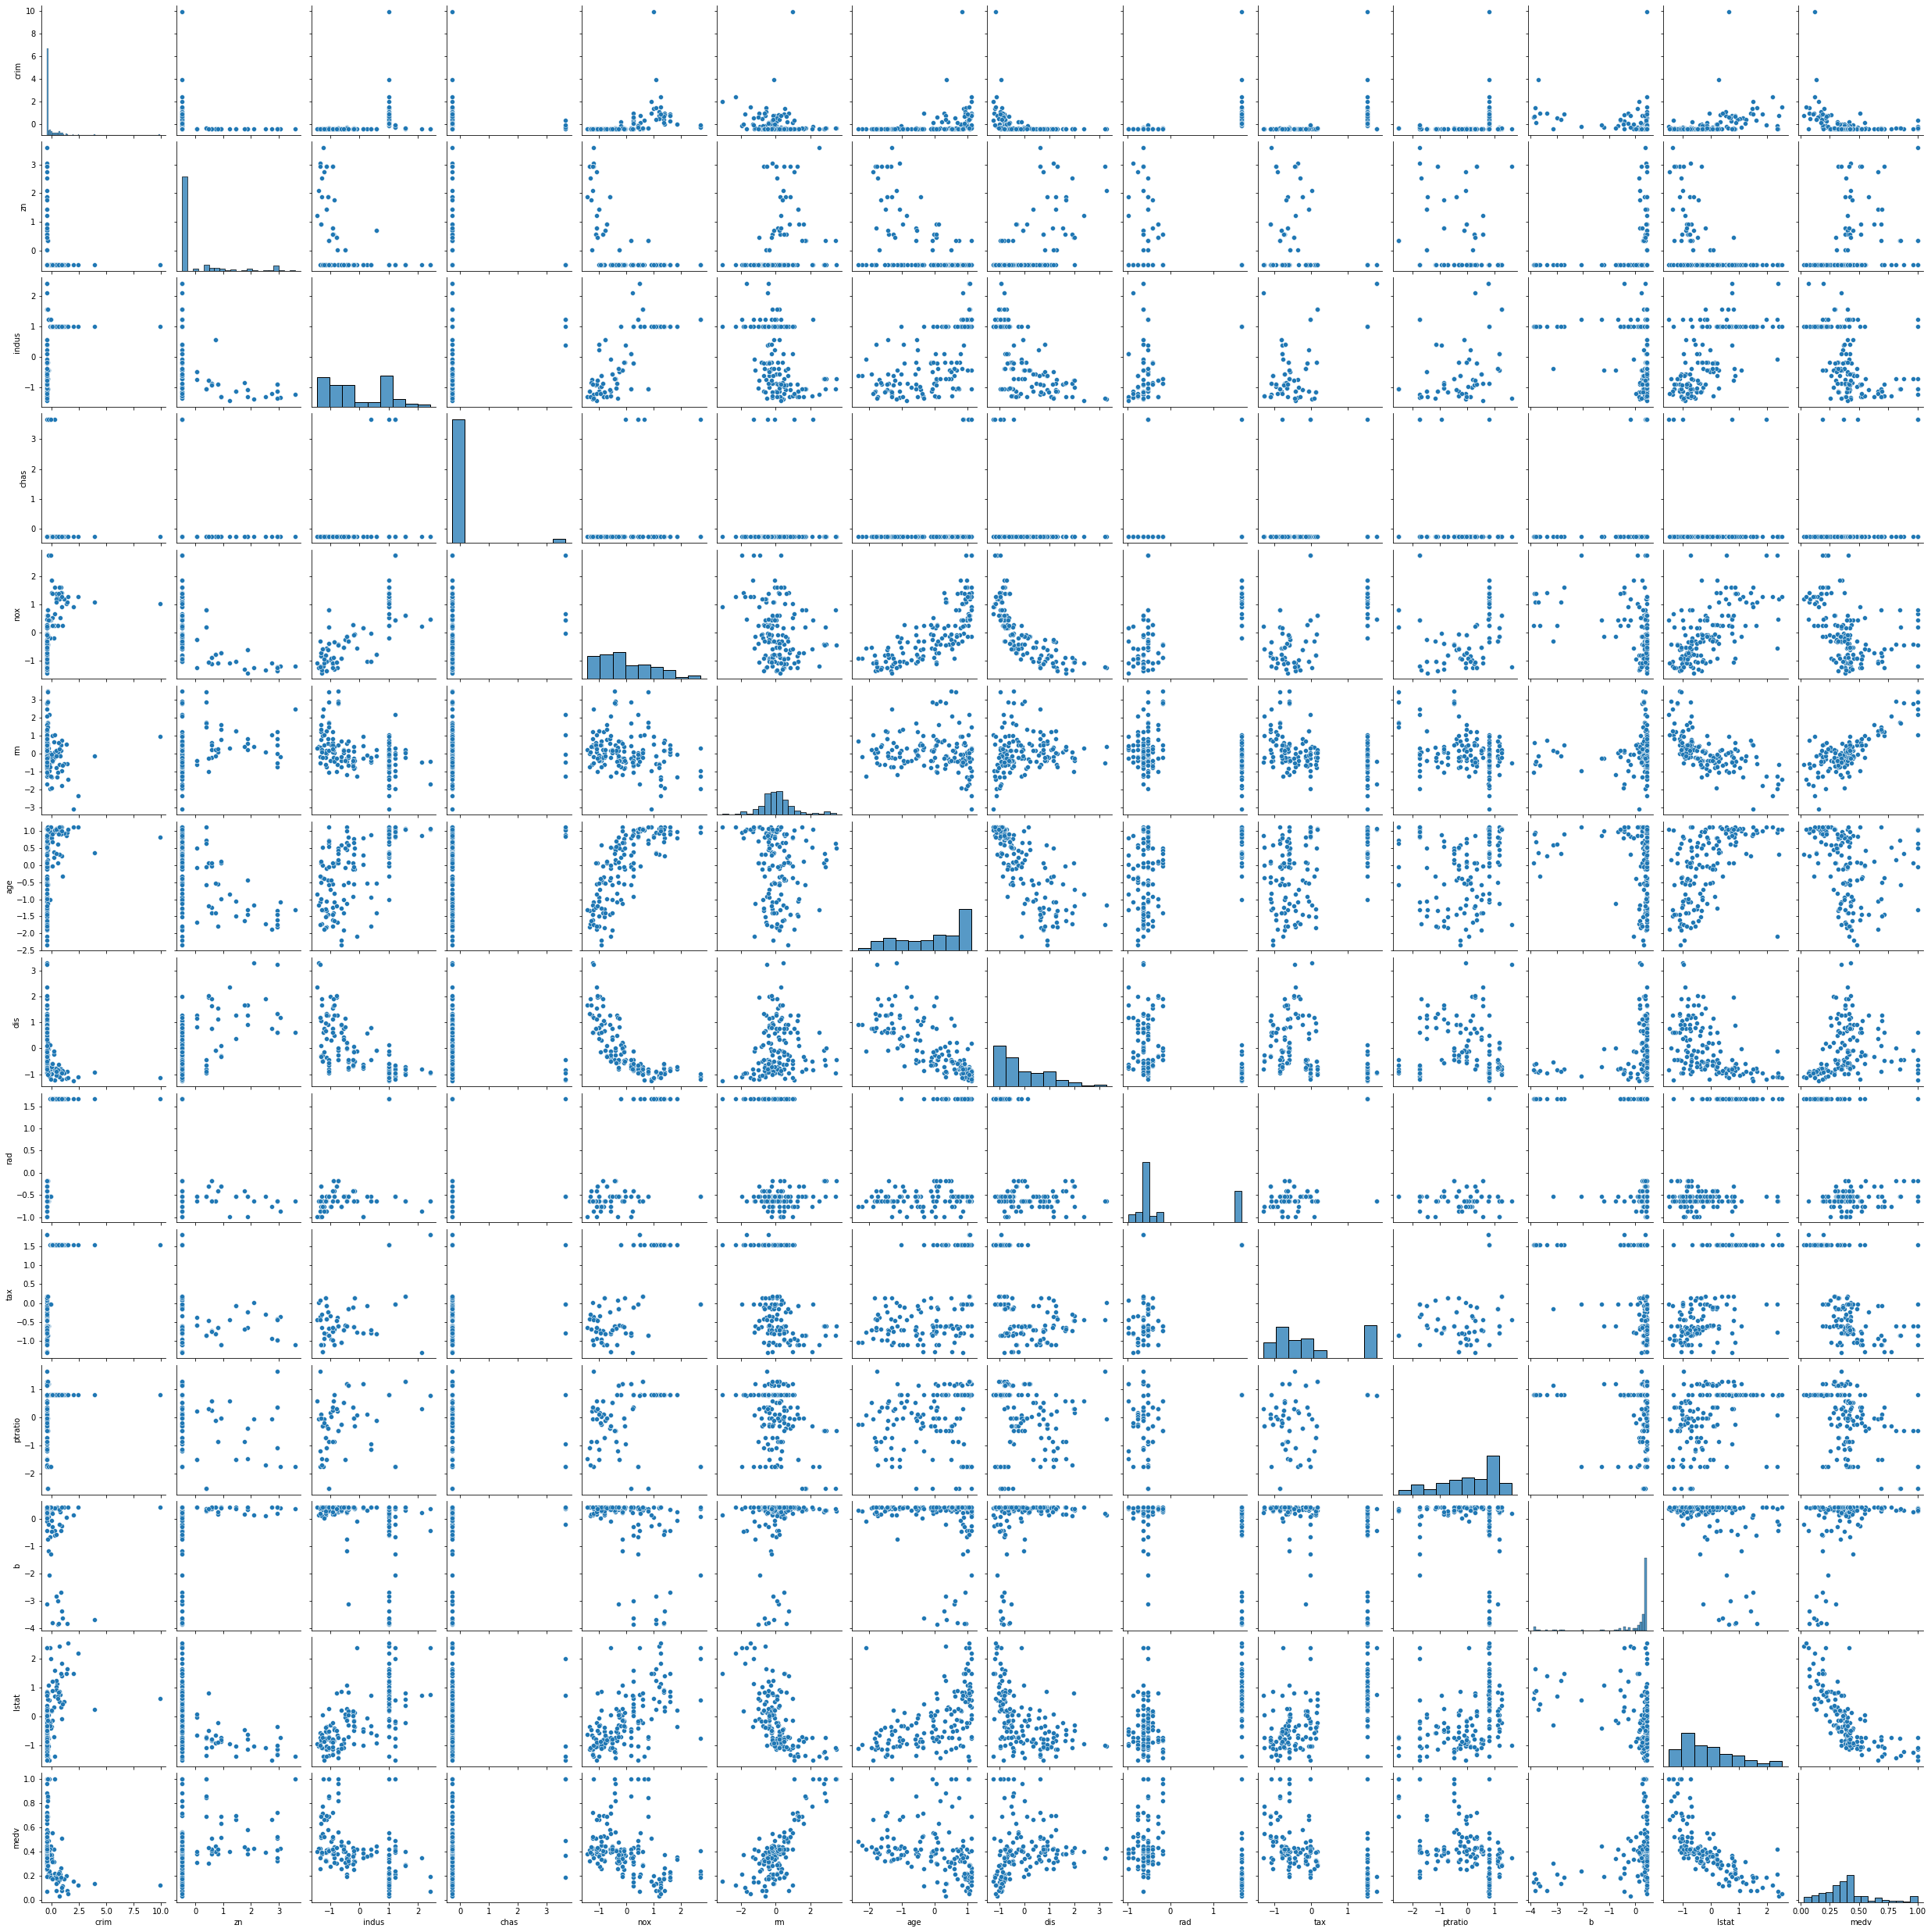

In [49]:
sns.pairplot(data.sample(n=150, random_state=1))

In [50]:
target = data.pop(LABEL)
target

0      0.422222
1      0.368889
2      0.660000
3      0.631111
4      0.693333
         ...   
501    0.386667
502    0.346667
503    0.420000
504    0.377778
505    0.153333
Name: medv, Length: 506, dtype: float32

In [51]:
data = pd.get_dummies(data, dtype="float32")
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287910,-0.272599,-0.144218,0.413672,-0.120014,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867882,-0.987329,-0.303095,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867882,-0.987329,-0.303095,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228576,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026502
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [52]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
train = train.batch(BATCH_SIZE)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
test = test.batch(BATCH_SIZE)